In [1]:
import numpy as np
import pandas as pd
import pytz
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

%matplotlib inline

instantiate date/time objects

In [ ]:
x = pd.to_datetime("2024-05-06")
x = pd.to_datetime("2024-05-06 23:00:00+08:00")
x = pd.to_datetime("2024-05-06 23:00:00").tz_localize("UTC")
x.tz_localize("America/Chicago")
x.tz_convert("Asia/Hong_Kong")
x.value # timestampe value in ns

# datetime index
dates = pd.date_range('2024-01-01', '2024-12-31', freq="WOM-3FRI")
dates = pd.date_range('2024-01-01', '2024-12-31', freq="B")

In [ ]:
df = pd.DataFrame(index=dates, data=dates)

In [ ]:
df.resample('1M').agg('first')

shift time/ date

In [ ]:
x + timedelta()
x + relativedelta(months=3)

example in shifting data

In [43]:
dates = pd.date_range('2024-01-01', '2024-12-31', freq='B')
data = np.random.standard_normal(len(dates))
df = pd.DataFrame(index=dates, data=data, columns=['original'])

In [60]:
df['rolling_mean'] = df['original'].rolling(5).mean()
df['pct_change'] = df['original'].pct_change()

<font size=5>simple stock plot

In [2]:
df_raw = pd.read_csv('sample_data/msft_price.csv')
df = pd.DataFrame(df_raw)

In [9]:
df['50d_rolling_avg'] = df['Close'].rolling(50).mean()
df['100d_rolling_avg'] = df['Close'].rolling(100).mean()
df['200d_rolling_avg'] = df['Close'].rolling(200).mean()


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# df.dropna(inplace=True)

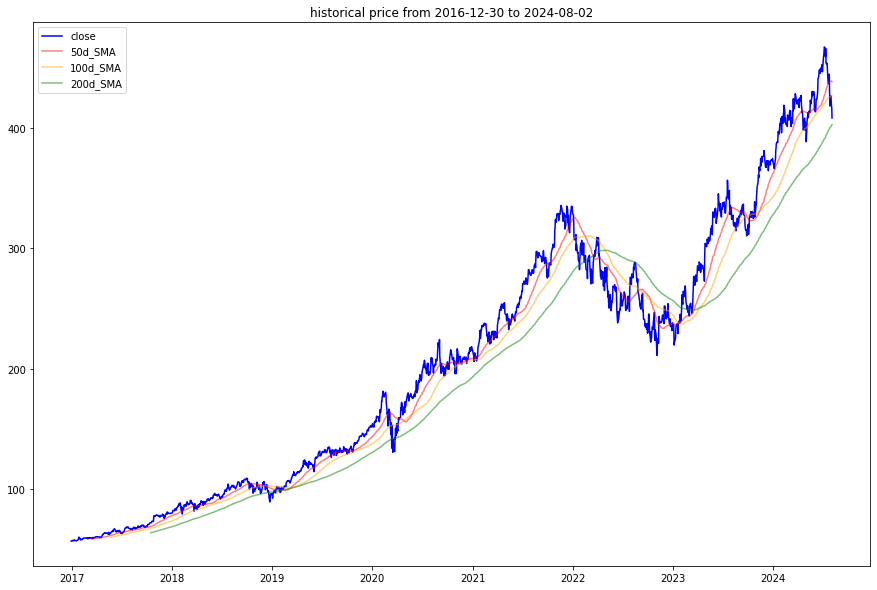

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(df.index, df['Close'], color='blue', label='close')
plt.plot(df.index, df['50d_rolling_avg'], color = 'red', alpha=0.5, label='50d_SMA')
plt.plot(df.index, df['100d_rolling_avg'], color='orange', alpha=0.5, label='100d_SMA')
plt.plot(df.index, df['200d_rolling_avg'], color='green', alpha=0.5, label='200d_SMA')
plt.title(
    "historical price from {} to {}".format(
        str(df.index.min().date()),
        str(df.index.max().date())
    )
    )
plt.legend()
plt.show()

In [ ]:
df.dropna(inplace=True)

In [61]:
df['position'] = np.where((df['Close']>=df['50d_rolling_avg']), 1, 0)

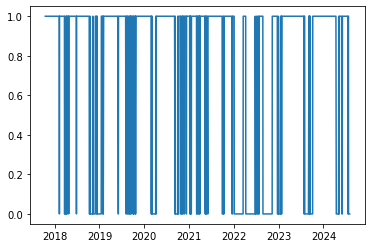

In [62]:
plt.plot(df.index, df['position'])

In [63]:
df['return'] = df['Close'].pct_change().fillna(0)
df['strategy_return'] = df['return'] * df['position']

In [69]:
df['return'].describe()

count    1710.000000
mean        0.001185
std         0.018331
min        -0.147390
25%        -0.007402
50%         0.001173
75%         0.010767
max         0.142169
Name: return, dtype: float64

In [68]:
df['strategy_return'].describe()

count    1710.000000
mean        0.002371
std         0.012697
min        -0.061947
25%        -0.001898
50%         0.000000
75%         0.007738
max         0.082268
Name: strategy_return, dtype: float64

In [67]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50d_rolling_avg,100d_rolling_avg,200d_rolling_avg,position,return,strategy_return
Date,,,,,,,,,,,,,
2017-10-16,71.643694,72.004596,71.578917,71.856537,12380100,0.0,0,68.599064,67.079053,63.378151,1,0.000000,0.000000
2017-10-17,71.689991,71.828801,71.486404,71.801033,16824000,0.0,0,68.702221,67.156221,63.454504,1,-0.000772,-0.000772
2017-10-18,71.875063,72.041634,71.597450,71.819542,13300700,0.0,0,68.798569,67.230445,63.528949,1,0.000258,0.000258
2017-10-19,71.782509,72.115650,71.578922,72.097145,15092800,0.0,0,68.906360,67.303302,63.606056,1,0.003865,0.003865
2017-10-20,72.476569,73.078074,72.384031,72.930008,22866400,0.0,0,69.050322,67.389734,63.687326,1,0.011552,0.011552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29,431.579987,432.149994,424.700012,426.730011,15125800,0.0,0,439.144800,426.285177,401.201126,0,0.003433,0.000000
2024-07-30,427.720001,429.049988,417.359985,422.920013,32687600,0.0,0,439.183400,426.500717,401.663035,0,-0.008928,-0.000000
2024-07-31,420.500000,421.779999,412.209991,418.350006,42891400,0.0,0,439.146201,426.600183,402.108359,0,-0.010806,-0.000000


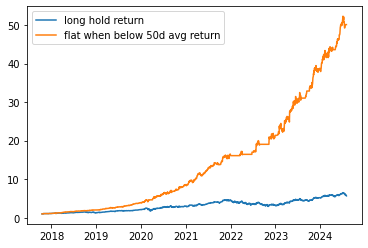

In [70]:
# TODO debug this return pls


plt.plot(df.index, (df['return'] + 1).cumprod(), label='long hold return')
plt.plot(df.index, (df['strategy_return'] + 1).cumprod(), label='flat when below 50d avg return')
plt.legend()

In [16]:
df['log_return'] = np.log(df['Close']) - np.log(df['Close'].shift(1))

<Axes: >

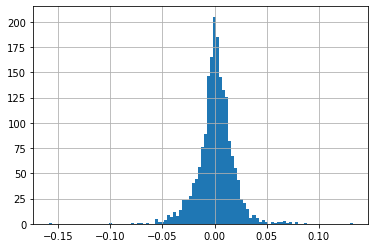

In [17]:
df['log_return'].hist(bins=100)